In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Variatie mica')

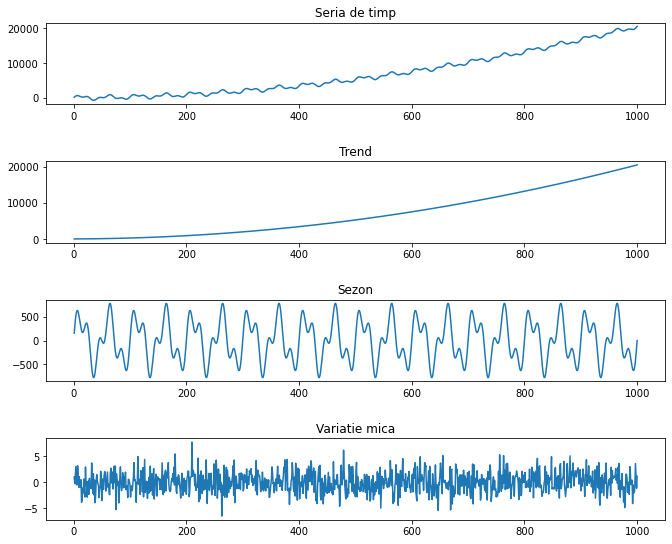

In [2]:
#1
np.random.seed(42)

N = 1000

time = np.arange(1, N + 1)

# Componenta de trend
trend = 0.02 * time ** 2 + 0.5 * time + 10

# Componenta sezonieră cu două frecvențe
seas1 = 500 * np.sin(2 * np.pi * time / 50)
seas2 = 300 * np.sin(2 * np.pi * time / 20)
seasonal = seas1 + seas2

# Componente variate folosind zgomot alb gaussian
noise = np.random.normal(0, 2, N)

time_series = trend + seasonal + noise

fig, axs = plt.subplots(4)
axs[0].plot(time, time_series)
axs[1].plot(time, trend)
axs[2].plot(time, seasonal)
axs[3].plot(time, noise)

plt.tight_layout()

fig.set_figheight(8)
fig.set_figwidth(10)

axs[0].set_title('Seria de timp')
axs[1].set_title('Trend')
axs[2].set_title('Sezon')
axs[3].set_title('Variatie mica')

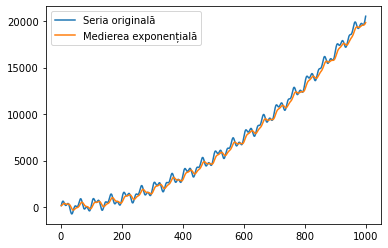

In [7]:
#2
alpha = 0.1

# Calculul medierii exponențiale
me = np.zeros_like(time_series)
me[0] = time_series[0]

for t in range(1, N):
    me[t] = alpha * time_series[t] + (1 - alpha) * me[t - 1]

# Afisare rezultate
plt.plot(time, time_series, label='Seria originală')
plt.plot(time, me, label='Medierea exponențială')
plt.legend()
plt.show()

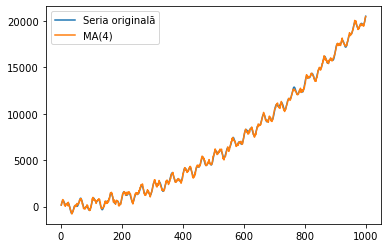

In [49]:
#3
q = 4
coefs = [0.5, 0.3, 0.2, 0.1]

# Distributia normala standard
epsilon = np.random.normal(0, 100, N)

# MA
ma = np.zeros_like(time_series)
for t in range(q, N):
    ma[t] = epsilon[t] + sum(coefs[i-1] * epsilon[t-i] for i in range(1,q+1))

#ma = ma + time_series

plt.plot(time, time_series, label='Seria originală')
plt.plot(time, ma, label=f'MA({q})')
plt.legend()
plt.show()